In [4]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
net_df = pd.read_csv("netflix1.csv")

net_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
net_df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
# Rename the "listed in" column to "genre for easier understanding"
net_df.rename(columns={
    "listed_in":"genre"
}, inplace=True)

net_df[:2]

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [8]:
net_df.shape

(8790, 10)

In [9]:
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   genre         8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [10]:
# Does the data contain any duplicate values?
net_df.duplicated().value_counts()

False    8790
dtype: int64

In [11]:
net_df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [12]:
# Does any column have an empty value
net_df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
dtype: int64

In [13]:
# Change the "TV show" value to "series" in type column
net_df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [14]:
net_df["type"].replace("TV Show", "Series", inplace=True)

net_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,Series,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,Series,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Data Summary

In [15]:
net_df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [16]:
# Unique values of various columns
cols = ["type", "country", "rating"]

for col in cols:
    print(net_df[col].value_counts(), "\n")

Movie     6126
Series    2664
Name: type, dtype: int64 

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64 

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64 



In [17]:
# Movies and series from the not given countries
net_df[net_df.country == "Not Given"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,Series,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers
...,...,...,...,...,...,...,...,...,...,...
6005,s8161,Movie,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,Not Given,1/1/2020,1990,PG,94 min,"Action & Adventure, Comedies"
6257,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,Not Given,9/1/2018,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
6366,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,Not Given,12/15/2019,2001,TV-Y7,60 min,"Children & Family Movies, Comedies"
6468,s8719,Movie,Westside vs. the World,Michael Fahey,Not Given,8/9/2019,2019,TV-MA,96 min,"Documentaries, Sports Movies"


In [18]:
net_df.iloc[20:40, :]

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
20,s4832,Series,True: Magical Friends,"Mark Thornton, Todd Kauffman",United States,6/15/2018,2018,TV-Y,1 Season,Kids' TV
21,s4833,Series,True: Wonderful Wishes,"Mark Thornton, Todd Kauffman",United States,6/15/2018,2018,TV-Y,1 Season,Kids' TV
22,s4857,Series,Dance & Sing with True,"Mark Thornton, Todd Kauffman",United States,5/18/2018,2018,TV-Y,1 Season,Kids' TV
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,Series,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
27,s21,Series,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,United States,9/22/2021,2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S..."
28,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore",United States,9/21/2021,2021,TV-Y,61 min,Children & Family Movies
29,s25,Movie,Jeans,S. Shankar,India,9/21/2021,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [20]:
net_df["type"].value_counts(normalize=True)

Movie     0.696928
Series    0.303072
Name: type, dtype: float64

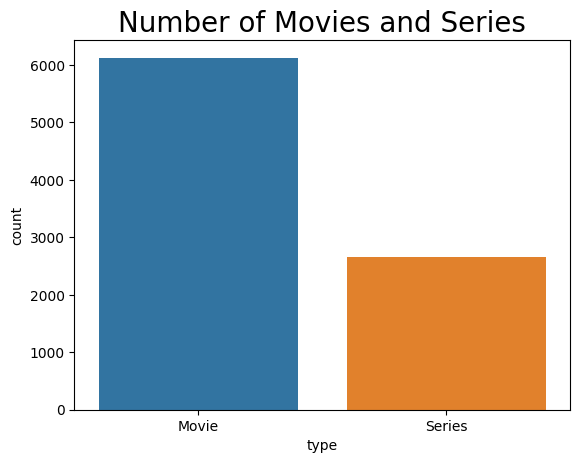

In [21]:
# How the number of movies and series compare to each other
sns.countplot(data=net_df , x="type")
plt.title("Number of Movies and Series", fontsize=20)
plt.show()

In [ ]:
top_10 = net_df["country"].value_counts().sort_values(ascending=False)
top_10

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Puerto Rico          1
Cyprus               1
Somalia              1
Paraguay             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

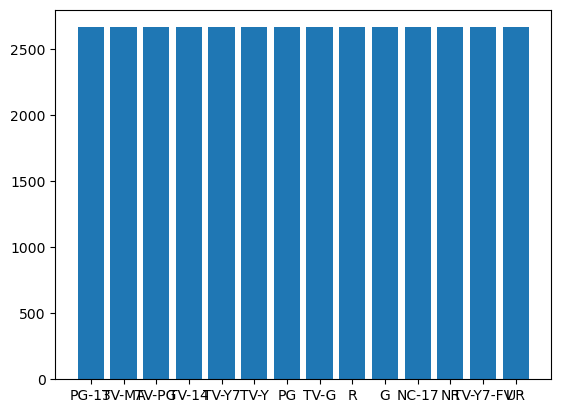

In [ ]:
plt.bar(net_df["rating"], net_df["type"].value_counts()[1])
plt.show()

In [ ]:
# Boxplot?

C:\Users\ronni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


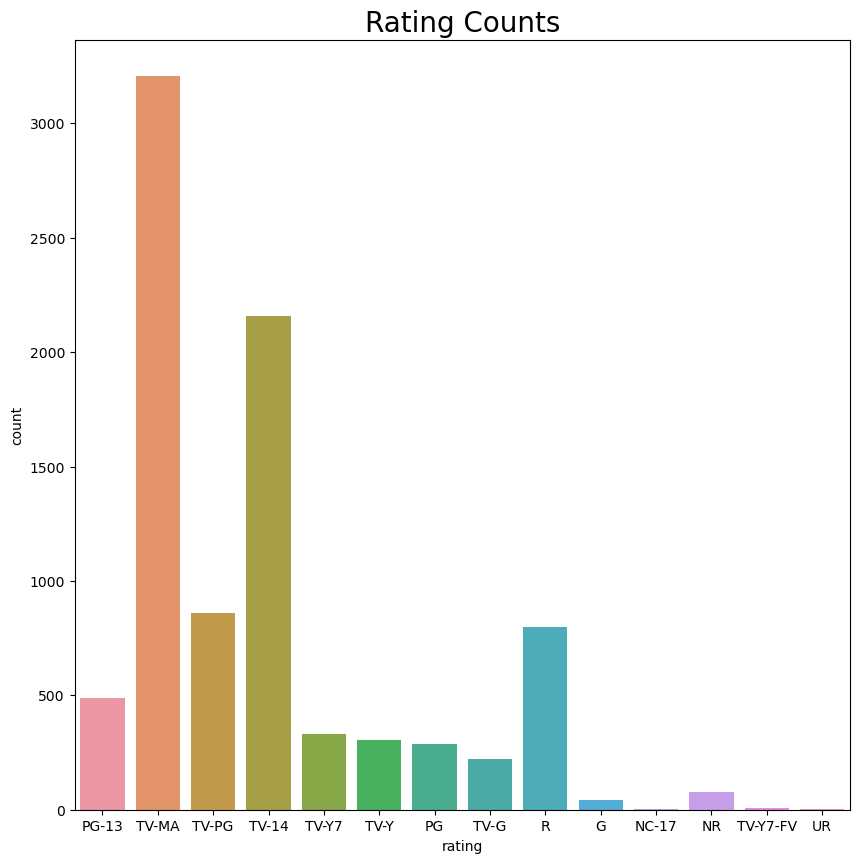

In [ ]:
# The number of different shows and their value counts
plt.figure(figsize=(10,10))
sns.countplot(net_df["rating"])
plt.title("Rating Counts", fontsize=20)
plt.show()

Most netflix shows are:
* TV-MA: Mature Adults only
* TV-14: Parents Strongly Cautioned
* R: Restricted (Adults only)

This means that Netflix is a platform most suitable for adults.

In [ ]:
net_df["release_year"].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [22]:
net_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,Series,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,Series,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


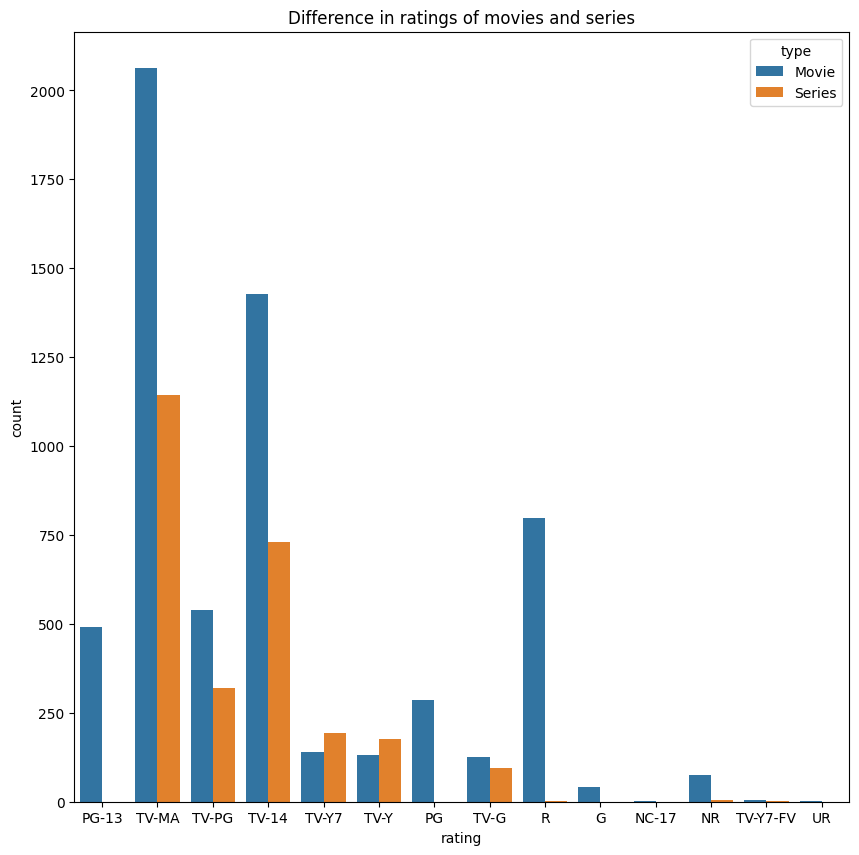

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(data=net_df, x="rating", hue="type")
plt.title("Difference in ratings of movies and series")
plt.show()

In [29]:
from geopy.geocoders import Nominatim

# Create an instance of the geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Create two new columns in the dataframe for latitude and longitude
net_df['Latitude'] = None
net_df['Longitude'] = None

# Iterate through the rows of the dataframe
for i, row in net_df.iterrows():
    location = geolocator.geocode(row['country'])
    if location:
        net_df.at[i, 'Latitude'] = location.latitude
        net_df.at[i, 'Longitude'] = location.longitude


net_df.head()


KeyboardInterrupt: 